## Mall Customers K-Means Clustering Analysis

#### Library Installation

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from sklearn.cluster import KMeans


In [41]:
warnings.filterwarnings('ignore')

In [3]:
os.chdir(r"/Users/SteveAhn/Downloads/1.DataAnalyst/Data")

#### Read in the Data

In [4]:
data = pd.read_csv("Mall_Customers.csv")

In [16]:
print("The data dimensions are ", str(data.shape[0]), " by ", str(data.shape[1]))

The data dimensions are  200  by  5


#### Take a look into what type of data are dealing with

In [17]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [18]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
#No Nulls - we can move forward with ease
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [66]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Distribution of Gender Binary

In [37]:
%%HTML
<div class='tableauPlaceholder' id='viz1566056918899' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Testz1&#47;Donut-Gender&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Testz1&#47;Donut-Gender' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Testz1&#47;Donut-Gender&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1566056918899');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Here, a donut pie chart is displayed to show the distribution of gender binary defined to strictly male and female from our data and clearly shows that it is not even, rather showing a higher percentage of females.

A deeper dive into the Gender Binary distribution through Boxplots

In [36]:
%%HTML
<div class='tableauPlaceholder' id='viz1566056897002' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Testz2&#47;AgeBoxplotbyGender&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Testz2&#47;AgeBoxplotbyGender' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Testz2&#47;AgeBoxplotbyGender&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1566056897002');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Interestingly - even if we have a higher percentage of females, the males have a larger interquartile range (75th percentile - 25th percentile) and a slightly higher maximum age. Now we know the age and gender distribution of our customers. 

Lets proceed.

### Distribution of Annual Income

Text(0,0.5,'Count')

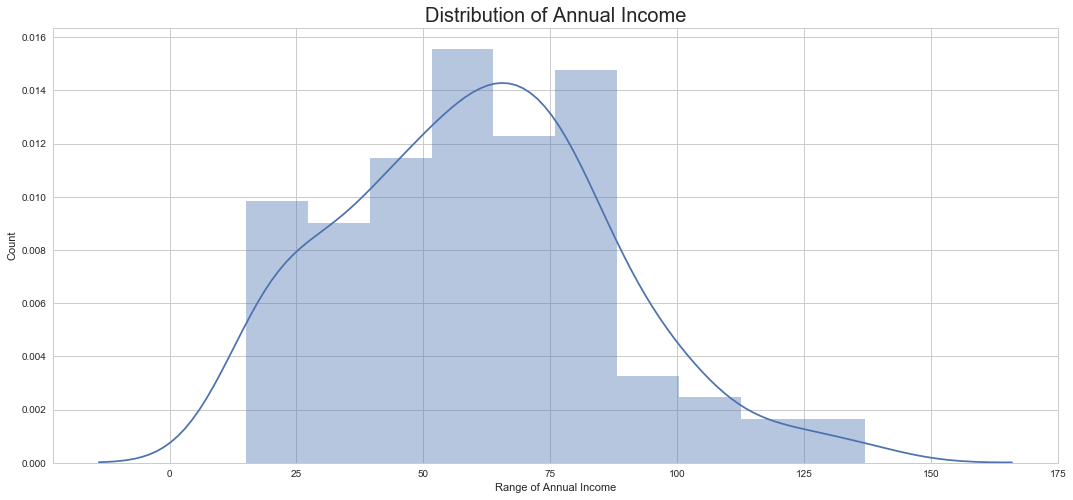

In [43]:
plt.rcParams['figure.figsize'] = (18, 8)


sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

Here in the plot above, the distribution of the annual income of the customers follows a similar pattern to how money is distributed realistically in the world where a large density of the distribution would be found in the middle to lower class.

We definitely do have our smaller but respectable size of the upper class - indicating a useful sample.
We can make an inference that our mall provides products and services catered to the masses rather than the aristocratic.

In [46]:
%%HTML
<div class='tableauPlaceholder' id='viz1566058064757' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Testz6&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Testz6&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Testz6&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1566058064757');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The interactive graph above from Tableau shows the frequency of customers that fall within the Annual Income bins and would look similar to that of the annual income density graph above this one if a line were fixated upon it with a changed axis.

Although, there is no clear pattern we can see two high peaks which may indicate two Gaussian Distributions if we decide to split it for future specialized analysis within our sample. We will stay with our current data.

In [47]:
%%HTML
<div class='tableauPlaceholder' id='viz1566058164874' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Testz7&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Testz7&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Testz7&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1566058164874');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The interactive graph above from Tableau displaying the frequency of customers on Spending Score bins is by far the most interesting of the group as it shows high peaks in three different regions - Low Spending Score (5-15), Average (35-60) Spending Score and Strong Spending Score (73-75). We could expect for future customers to fall within these regions with a higher probability than the other troughs found between these regions.

The Mall's forefront business is heavily dependent on all types of buyers but has a higher affinity for the average buyers. We have seen before that these types of customers have the highest frequency from Annual Income to Spending Score.


### KMeans Clustering

#### Correlation Check

Below is a correlation matrix of all the features of the data depicted in colors ranging from black (zero to low correlation) to a white-ish teal (high correlation). A correlation of a feature of the data with itself will always return 1, therefore displaying the diagonal 1 matrix as well.

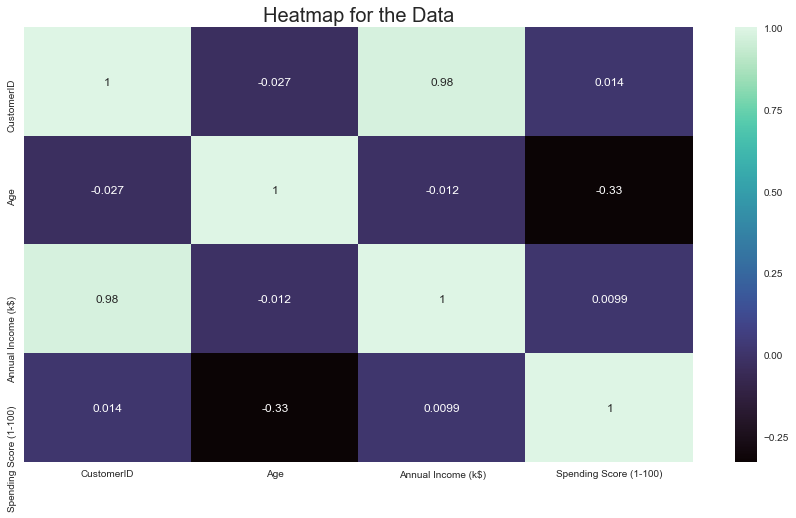

In [49]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'mako', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

If there was a high correlation between our features, we would attack multicollinearity by either removing one of the two features, transform the two into one feature, or in some rare cases - keep both features. 

Due to the low correlational values in our matrix, we will continue on with all the features.

#### Deciding K for KMeans Clustering with the Elbow Method

In [51]:
#Subsetting Annual Income and Spending Score while ensuring its matrix form
x = data.iloc[:, [3, 4]].values
x.shape

(200, 2)

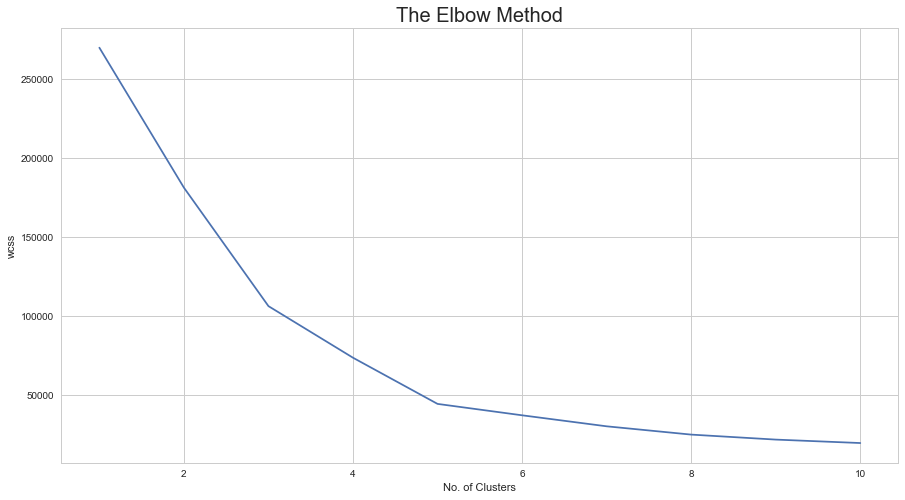

In [53]:
#Elbow Method 
wcss = []         #within-cluster sum of squares
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

From our Elboe Method plot, it seems that 5 clusters is the optimal number for k.
We decide to go with 5 clusters by observing the graph's minimal decrease of within-cluster sum of squares (wcss) after 5 clusters and therefore on until 10.

### Visualizing K-Means Clustering

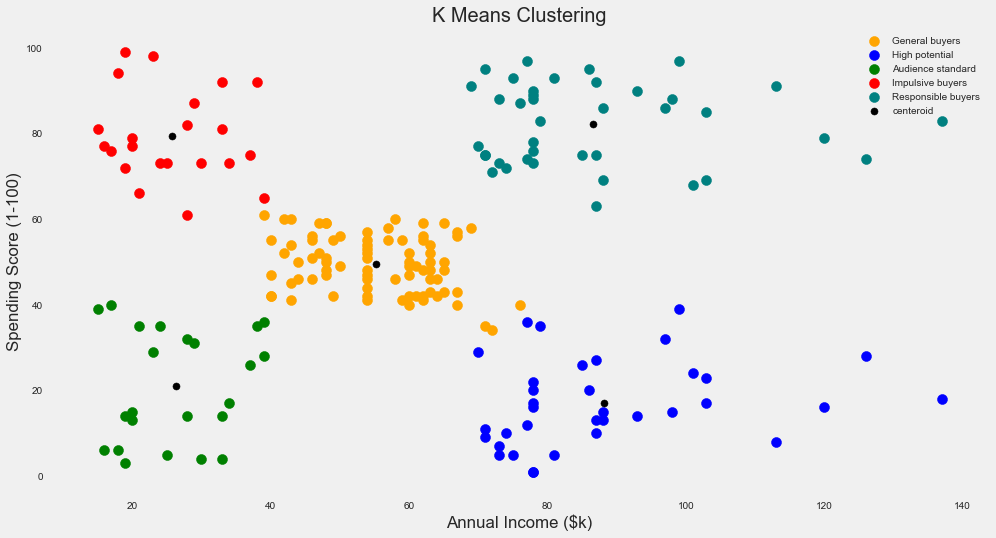

In [80]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'orange', label = 'General buyers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'blue', label = 'High potential')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'green', label = 'Audience standard')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'red', label = 'Impulsive buyers')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'teal', label = 'Responsible buyers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()

Visualizing our K(5)-Means Cluster gives us great insight into how we should segment our customers. The customers were categorized into the 
- "Responsible Buyers" found in the Low Annual Income / Low Spending Score
- "Impulsive Buyers" found in the Low Annual Income / High Spending Score
- "General Buyers" found in the Average Annual Income / Average Spending Score
- "High Potential" found in the High Annual Income / Low Spending Score
- "Audience Standard" found in the High Annual Income / High Spending Score

From a business perspective, there is a respective gold mine within the "High Potential" group where their annual income is high but their spending score is low. Targeting any sort of advert campaigns could lead to the highest return as their spending would be more stable as opposed to the "Irresponsible buyers" as their spending score could be more volatile.

### KMeans Clustering Visualization with Age

In [34]:
%%HTML
<div class='tableauPlaceholder' id='viz1566056859652' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Testz3&#47;K5MeansClusterAnalysis&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Testz3&#47;K5MeansClusterAnalysis' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Testz3&#47;K5MeansClusterAnalysis&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1566056859652');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The final visualization that provides the most insight as we can see a trend by adding in age into the size of the circles within each cluster.

We can see that majority of the younger generation have high spending scores regardless of their Annual Income, therefore it would be more profitable to invest resources to the younger generation.
The older generation follows a linear trend up until the older generation surpasses the Annual Income of around 70k. This is quite interesting as higher income does not indicate higher spending score for the older generation. Again, it would be far more easier and make more sense to target those with high potential for spending indicated through high Annual Income. 

In [74]:
from IPython.display import HTML
HTML('<img src="../Data/Fin.gif">')

## FIN - Thank you.